In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/classification-data-predict/test_with_no_labels.csv
/kaggle/input/classification-data-predict/train.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/classification-data-predict/train.csv')
test_df = pd.read_csv('/kaggle/input/classification-data-predict/test_with_no_labels.csv')

# Check the structure and contents of the train dataset
print(train_df.head(10))

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
5          1  Worth a read whether you do or don't believe i...   425577
6          1  RT @thenation: Mike Pence doesn’t believe in g...   294933
7          1  RT @makeandmendlife: Six big things we can ALL...   992717
8          1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510
9          1  RT @paigetweedy: no offense… but like… how do ...   260471


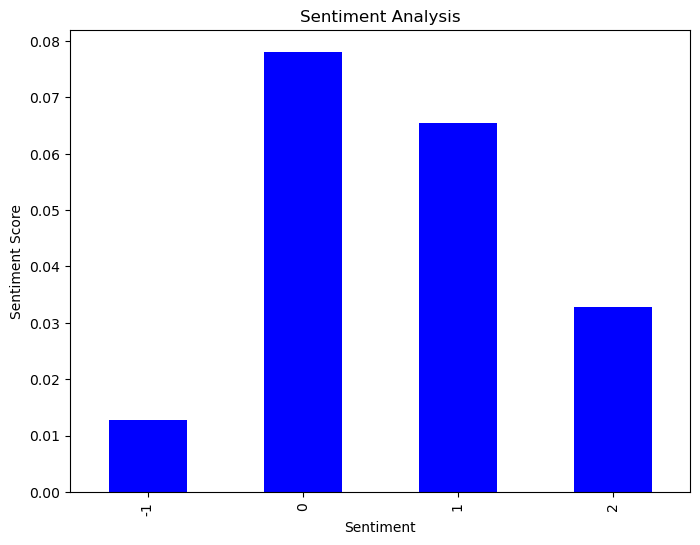

In [3]:
# Calculate sentiment scores for each category
sentiment_scores = train_df.groupby('sentiment')['message'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)

# Visualize sentiment scores using a bar graph
plt.figure(figsize=(8, 6))
sentiment_scores.plot(kind='bar', color='blue')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis')
plt.show()


In [4]:
import re

def clean_text(text):
    text = re.sub('[\d-]', '', text) #remove any numbers
    text = re.sub(r'RT', '', text) #remove the retweets
    text = re.sub(r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+', r'http', text) #remove the url and replace with http
    return text

In [5]:
train_df['message'] = train_df['message'].apply(clean_text)

In [6]:
# Check the shape of the datasets
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Display the first few rows of the train dataset
print("\nTrain dataset head:")
print(train_df.head())

# Check the distribution of classes in the train dataset
class_counts = train_df['sentiment'].value_counts()
print("\nClass distribution in the train dataset:")
print(class_counts)

Train dataset shape: (15819, 3)
Test dataset shape: (10546, 2)

Train dataset head:
   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2   @RawStory: Researchers say we have three year...   698562
3          1  #TodayinMaker# WIRED :  was a pivotal year in ...   573736
4          1   @SoyNovioDeTodas: It's , and a racist, sexist...   466954

Class distribution in the train dataset:
 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_data(train, test):
    vectorizer = TfidfVectorizer()
    train_data = vectorizer.fit_transform(train)
    test_data = vectorizer.transform(test)
    return train_data, test_data, vectorizer

In [8]:
# Preprocess the data
train_data, test_data, vectorizer = vectorize_data(train_df['message'], test_df['message'])
feature_names = vectorizer.get_feature_names_out()
for name in feature_names:
    print(name)


______
__branman
__lyly
__stellaaaar
_aglh
_alexhirsch
_america
_andrew_griffin
_anthonyburch
_anunnery
_aye_its_grace
_babykhai
_benjvmins_
_blank
_cjwade
_com
_cudder
_donaldson
_drew_mccoy_
_eleanorwebster
_emawee_
_isabella_c__
_madisonwalsh_
_makada_
_metafizik
_mine_view
_mryezzir
_niallmccarthy
_ohmeohmaya
_ortz
_oscience
_richardblack
_ryanburnett
_rysosceles
_s_clark
_sanctified
_seanohue
_shenanagins
_spiritcircle_
_stephenhoward
_summerstanton
_tempo
_tylermaine
_u_r_n
_unionistparty
_wintergirl
_xninox_
_yellowcxrd
_zeets
a_liberty_rebel
a_real_msmith
aaaaaaaaaaa
aaaaaand
aaaaand
aaaand
aaas
aag
aalicesayss
aan
aapgujarat
aapinnews
aapnews
aapsyc
aaronbastani
aaronwherry
aashi_
aatechnology_in
ab
ab_noble
abaixoassinado
abandon
abandoned
abandoning
abandons
abbot
abbott
abbyhoward
abbymartin
abc
abcchicago
abcdesposito
abcnews
abcnewsmelb
abcpolitics
abcthedrum
abcworldnews
abcã
abdah
abdulszn
abdwj
aberdeenshire
aberrations
aberuni
aberuninews
abfalecbaldwin
abfortisetlibe

In [9]:
from sklearn.model_selection import train_test_split
y = train_df[['sentiment']]
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

tree_model = RandomForestClassifier(max_depth = 75, random_state=10)
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
print(classification_report(y_test, predictions, target_names=['2: News', '1: Pro', '0: Neutral', '-1: Anti']))

/tmp/ipykernel_20/894699739.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  tree_model.fit(X_train, y_train)


              precision    recall  f1-score   support

     2: News       0.94      0.12      0.21       278
      1: Pro       0.85      0.16      0.27       425
  0: Neutral       0.66      0.95      0.78      1755
    -1: Anti       0.83      0.63      0.71       706

    accuracy                           0.70      3164
   macro avg       0.82      0.46      0.49      3164
weighted avg       0.75      0.70      0.65      3164



In [11]:
tree_model = RandomForestClassifier(max_depth = 75, random_state=10)
tree_model.fit(train_data, train_df['sentiment'])
predictions = tree_model.predict(test_data)

from sklearn.linear_model import RidgeClassifier
final_ridge_model = RidgeClassifier()
final_ridge_model.fit(train_data, train_df['sentiment'])
predictions = final_ridge_model.predict(test_data)

In [12]:
submission = pd.DataFrame({'tweetid': test_df['tweetid'], 'sentiment':predictions})
submission.to_csv('submission.csv', index=False)

predictions.shape

(10546,)